In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
#reading the data 
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
# It looks like we have 2 columns with missing values(Product_Category_2, Product_Category_3)

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
df.shape

(537577, 12)

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0] * 100
missing_values

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64

In [10]:
# Product category 3 is missing almost 70% in total and 31 % for product category 2 

In [11]:
# So looks like Product_Category_2 and Product_Category_3 have some null values.
# We could check their unique values and then assign a default value accordingly for NaNs

In [249]:
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [12]:
# So all values are in integer range. May be we can assign value zero for the NaN cases
# I believe that the NaN values forProduct_Category_2 and Product_Categrory_3 
# would mean that the concerned person did not buy the products from these categories.
# Hence, I believe that it would be safe to replace them with 0.
df.fillna(value=0,inplace=True)

In [13]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


## Visualization

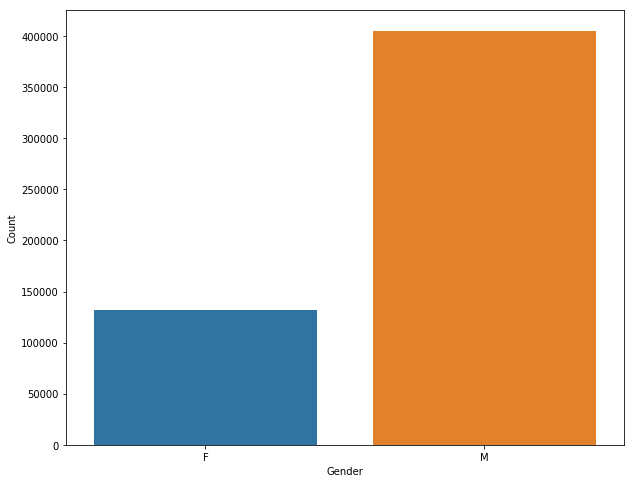

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [16]:
# Looking at above count plot, looks like very less number of females attended the black friday sale. 
# But it could also mean may be their spouse paid for them. We only know the person who makes payment

Text(0.5,0,'Age Group')

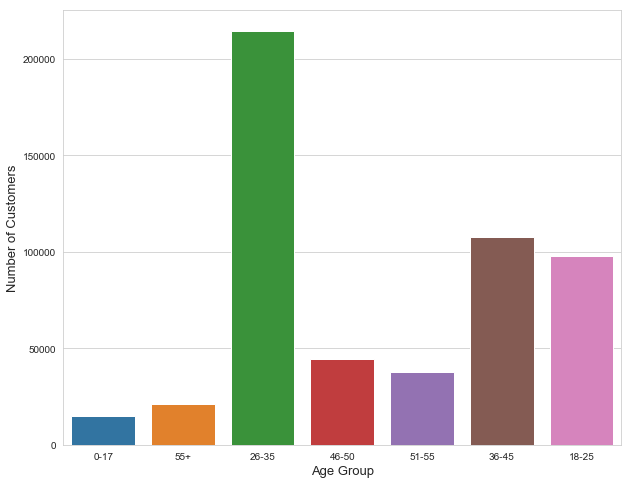

In [17]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(df['Age'])
plt.ylabel('Number of Customers', fontsize=13)
plt.xlabel('Age Group', fontsize=13)

In [18]:
# We have a lot of 26-35 age group customers

Text(0.5,0,'Age Group')

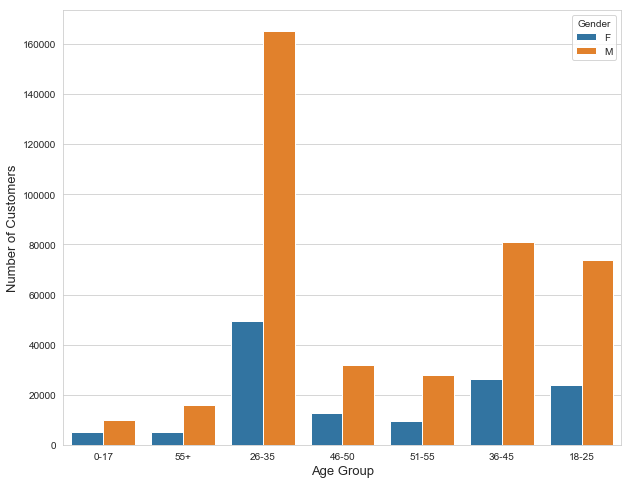

In [19]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(df['Age'],hue=df['Gender'])
plt.ylabel('Number of Customers', fontsize=13)
plt.xlabel('Age Group', fontsize=13)

In [20]:
# From the chart above, I think we should check married status because I feel like males are paying
# for females a lot here

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [22]:
def combine_G_M(input):
    gender = input[0]
    married_status = input[1]
    return gender + '_' + str(married_status)

In [23]:
df['combined_G_M'] = df[['Gender', 'Marital_Status']].apply(combine_G_M, axis=1)

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,M_0


Text(0.5,0,'Age Group')

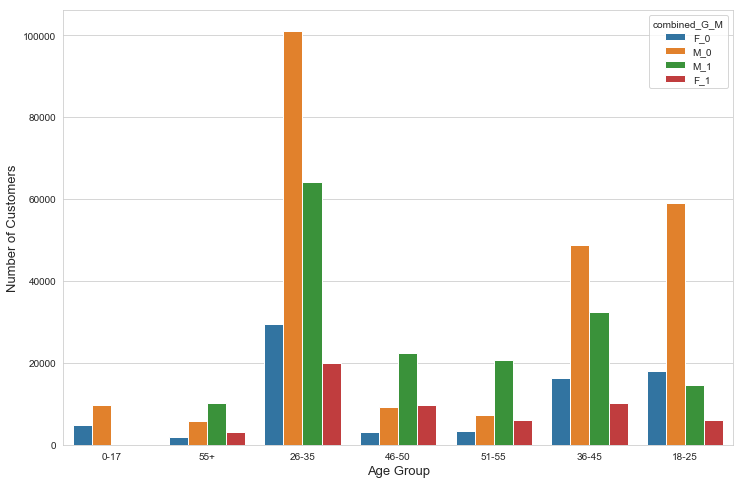

In [25]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(df['Age'],hue=df['combined_G_M'])
plt.ylabel('Number of Customers', fontsize=13)
plt.xlabel('Age Group', fontsize=13)

As we see above, there are no bars for the married in the 0-17 range which makes sense. And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. 

## Purchase Power vs Age Group

In [258]:
purchase_by_group = df.groupby('Age')['Purchase'].sum().reset_index().sort_values('Purchase', ascending= False)
purchase_by_group.head()

,Age,Purchase
2,26-35,1999749106
3,36-45,1010649565
1,18-25,901669280
4,46-50,413418223
5,51-55,361908356


Text(0.5,1,'Purchase vs Age Group')

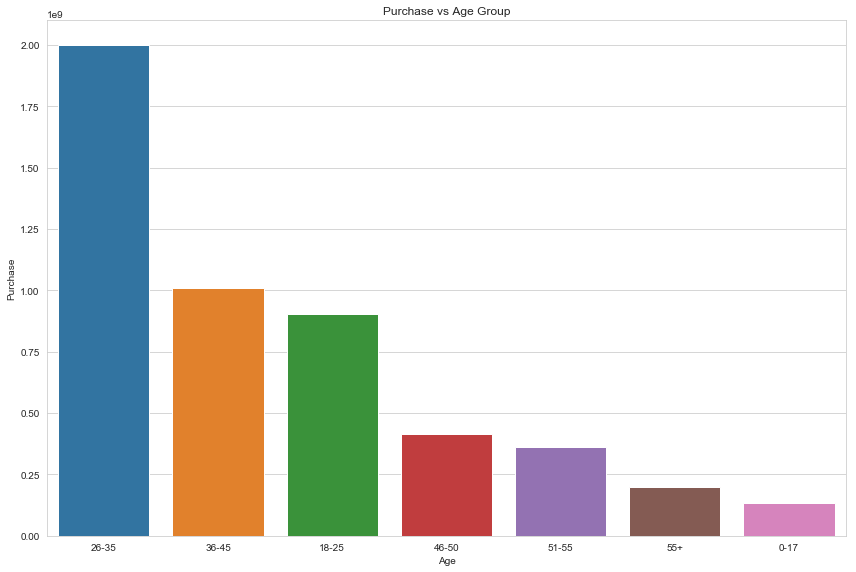

In [262]:
plt.figure(figsize=(12,8))
sns.barplot(purchase_by_group.Age, purchase_by_group.Purchase)
plt.tight_layout()
plt.title('Purchase vs Age Group')

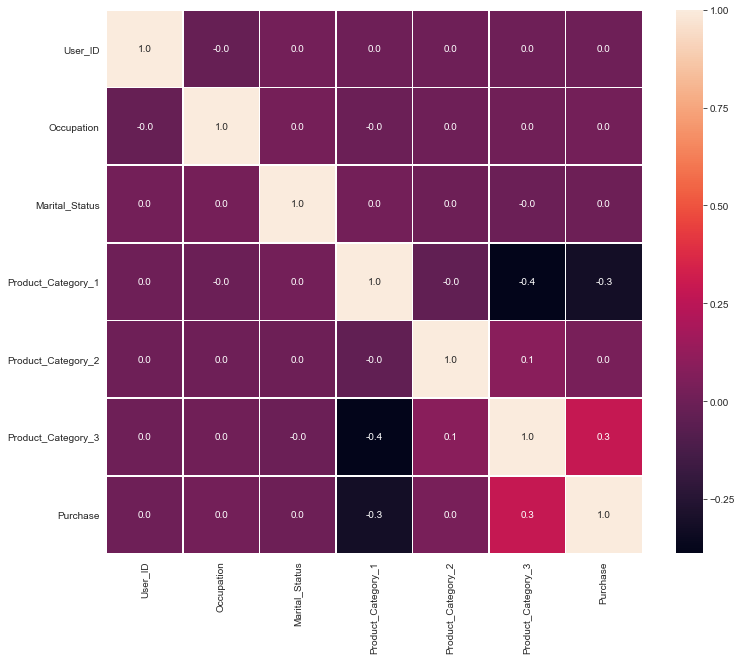

In [26]:
#correlation map
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [27]:
 # Number of person who buys more Product_Category_1 is small. 
# Number of person who buys less Product_Category_1 is big

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,M_0


## Occupation

Text(0,0.5,'Occupation Count')

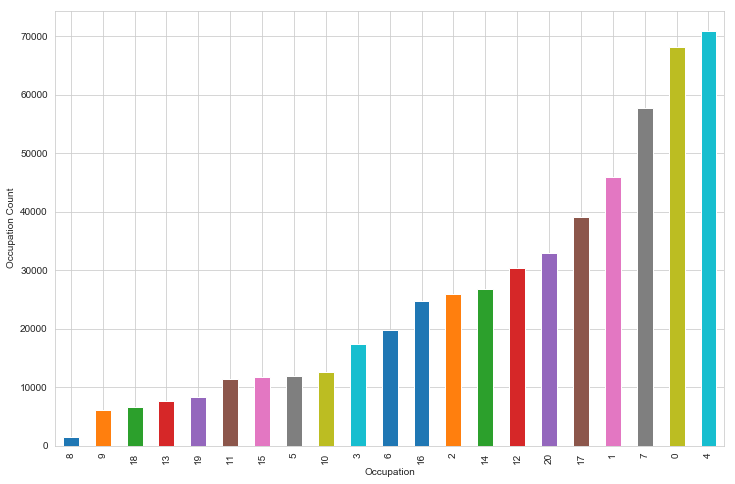

In [29]:
fig1, ax1 = plt.subplots(figsize=(12,8))
df['Occupation'].value_counts().sort_values().plot('bar')
plt.xlabel('Occupation')
plt.ylabel('Occupation Count')

In [30]:
# We have a lot of occupation 4 and 0 who are shoppping here

In [31]:
occupation_vs_purchase = df.groupby('Occupation')['Purchase'].sum().sort_values(ascending= False).reset_index()
occupation_vs_purchase

,Occupation,Purchase
0,4,657530393
1,0,625814811
2,7,549282744
3,1,414552829
4,17,387240355
5,12,300672105
6,20,292276985
7,14,255594745
8,16,234442330
9,2,233275393


Text(0.5,1,'Purchase vs Occupation')

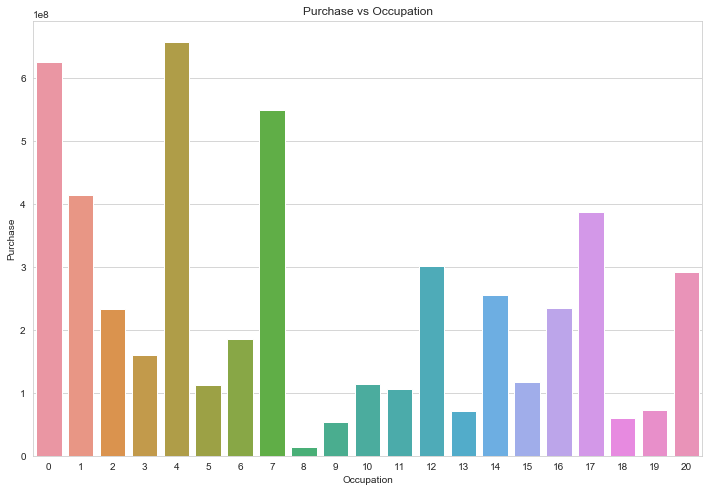

In [32]:
fig1, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(x= 'Occupation', y='Purchase', data = occupation_vs_purchase)
plt.title('Purchase vs Occupation')

In [33]:
# people who have occupation in 4 tends to purchase a lot 
# but unfortunately, we don't have occupation description to know what exactly it is.

## Product Category 1 Purchase Power

In [34]:
df.Product_Category_1.value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [43]:
product_category_1_pur = df.groupby('Product_Category_1')['Purchase'].sum().reset_index().sort_values('Purchase', ascending= False)
product_category_1_pur.head()

,Product_Category_1,Purchase
0,1,1882666325
4,5,926917497
7,8,840693394
5,6,319355286
1,2,264497242


ax = product_category_1_pur.plot.bar(figsize=(12,8), title='Product Category 1 vs. Purchase Power')
ax.set_xlabel('Product Category')
ax.set_ylabel('Purchase')

In [59]:
# 0 in product category 1 has the most purchase

## Top 10 products

In [61]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,M_0


In [67]:
top_10_products = df.groupby('Product_ID')['Purchase'].sum().reset_index().sort_values('Purchase', ascending= False)[:10]
top_10_products

,Product_ID,Purchase
249,P00025442,27532426
1014,P00110742,26382569
2441,P00255842,24652442
1743,P00184942,24060871
581,P00059442,23948299
1028,P00112142,23882624
1016,P00110942,23232538
2261,P00237542,23096487
565,P00057642,22493690
104,P00010742,21865042


Text(0.5,1,'Product Id vs Purchase')

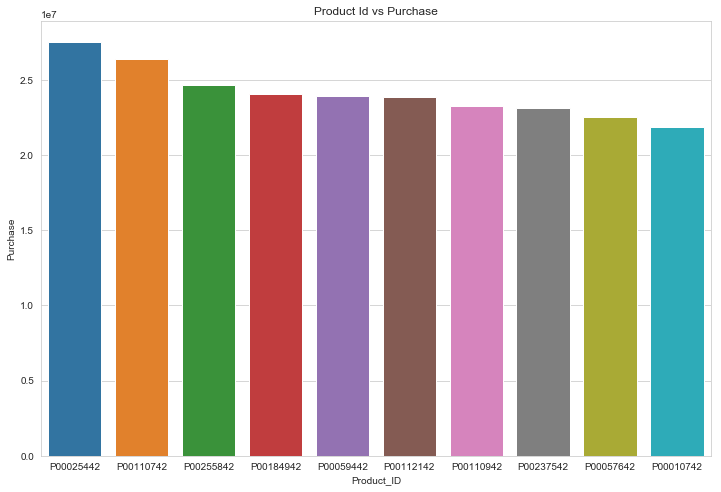

In [70]:
plt.figure(figsize=(12,8))
sns.barplot(top_10_products.Product_ID, top_10_products.Purchase)
plt.title('Product Id vs Purchase')

In [71]:
# Look likes P00025442 is one which has the most purchased

## Top 10 customers

In [80]:
top_10_customers = df.groupby('User_ID')['Purchase'].sum().reset_index().sort_values('Purchase', ascending= False)[:10]
top_10_customers

,User_ID,Purchase
4166,1004277,10536783
1634,1001680,8699232
2831,1002909,7577505
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6565878
981,1001015,6511302
3297,1003391,6476786
1142,1001181,6387899
534,1000549,6310604


Text(0.5,1,'User Id vs Purchase')

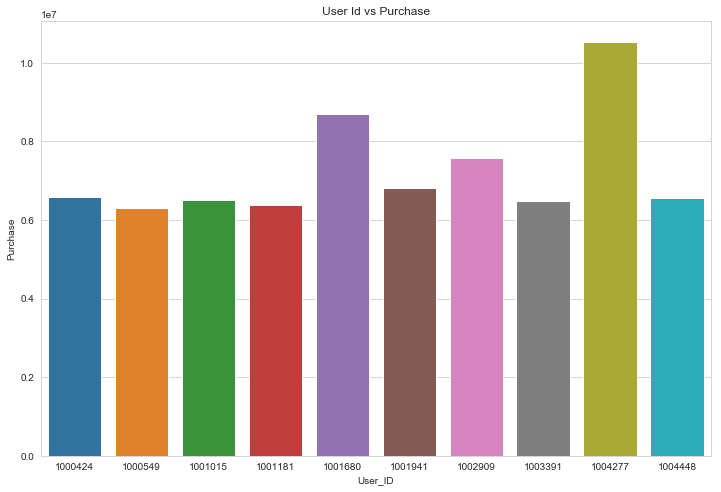

In [153]:
plt.figure(figsize=(12,8))
sns.barplot(top_10_customers.User_ID, top_10_customers.Purchase)
plt.title('User Id vs Purchase')

In [95]:
# customer with id 1004277 spends the most in the store

## Top 10 Customers Occupation

In [121]:
top_10_customers.User_ID.tolist()

[1004277,
 1001680,
 1002909,
 1001941,
 1000424,
 1004448,
 1001015,
 1003391,
 1001181,
 1000549]

In [125]:
top_10_customers_df = df[df['User_ID'].isin(top_10_customers.User_ID.tolist())]

In [161]:
top_10_customers_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
2619,1000424,P00246142,M,26-35,17,A,3,0,1,15.0,17.0,15802,M_0
2620,1000424,P00352842,M,26-35,17,A,3,0,2,6.0,15.0,13014,M_0
2621,1000424,P00177142,M,26-35,17,A,3,0,8,13.0,0.0,9932,M_0
2622,1000424,P00350142,M,26-35,17,A,3,0,8,17.0,0.0,9739,M_0
2623,1000424,P00126142,M,26-35,17,A,3,0,8,16.0,0.0,9779,M_0


In [183]:
top_10_customers_occupation = top_10_customers_df.groupby(['User_ID'])['Occupation'].unique().apply(pd.Series)

In [189]:
top_10_customers_occupation.rename(columns={0: 'Occupation'}, inplace=True)
top_10_customers_occupation.head()

,Occupation
User_ID,
1000424,17
1000549,6
1001015,3
1001181,7
1001680,20


In [193]:
top_10_customers_grouped = pd.merge(left = top_10_customers_occupation, right=top_10_customers, on='User_ID', how='inner')
top_10_customers_grouped.head()

,User_ID,Occupation,Purchase
0,1000424,17,6573609
1,1000549,6,6310604
2,1001015,3,6511302
3,1001181,7,6387899
4,1001680,20,8699232


C:\Users\KayToBe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

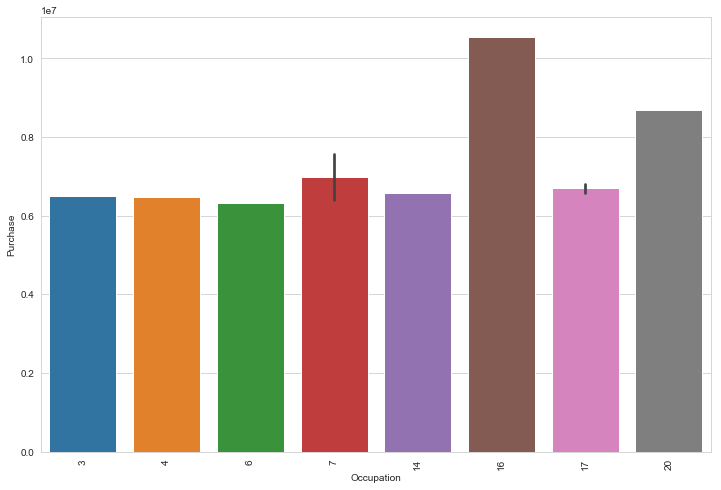

In [199]:
plt.figure(figsize=(12,8))
sns.barplot(x='Occupation', y= 'Purchase', data = top_10_customers_grouped)
plt.xticks(rotation='90')

In [200]:
# the person with occupation 16 purchased the most

## Stay in Current City Years

In [202]:
# We also want to know if stay in current city year has any effect on purchase

In [203]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,M_0


In [208]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

Stay_In_Current_City_Years
0      672505429
1     1763243917
2      934676626
3      872531130
4+     774711276
Name: Purchase, dtype: int64

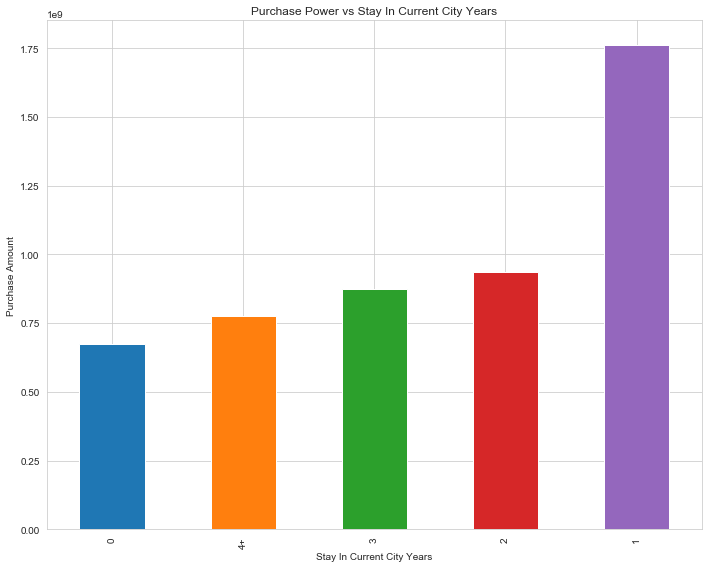

In [228]:
plt.figure(figsize=(10,8))
ax = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().sort_values().plot.bar()
ax.set_xlabel('Stay In Current City Years')
ax.set_ylabel('Purchase Amount')
plt.title('Purchase Power vs Stay In Current City Years')
plt.tight_layout()

### We have worked hard in the past two years and have achieved a large percentage of sales from the new population of cities, but the chart above indicates that the older city dwellers have less passion for our products. The drop from amount spend on our products drops significant after year 2.

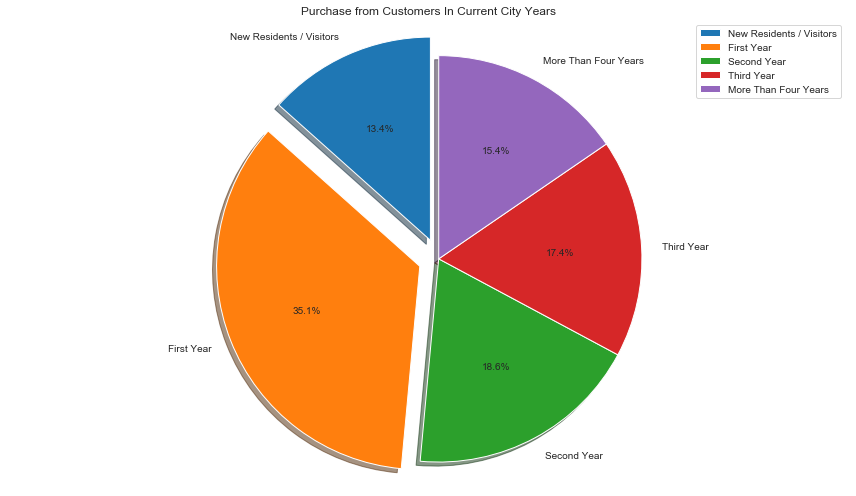

In [234]:
labels=['New Residents / Visitors','First Year','Second Year','Third Year','More Than Four Years']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Purchase from Customers In Current City Years')
plt.tight_layout()
plt.legend()
plt.show()

## Conclusion

On the Black Friday Day, we have at least 537,577 customers visited our store and their average age was 19-45 and we gained sales by 5 billoin dollars. There are 21 unique occupations amongs our customers and 59% of them are not married, 41% are married. Customers who stay within the city in 1 year tends to spend the most and those who stay more than 1 year don't seem to have much interested in buying our products compare to 1 year group. The longer they stay within the city, the lesser they spend money on our products. 26-35 is the most dominant age group both in amount and total spend. There're little over 200,000 of them and they spend nearly 2 billion dollars in our store acquired almost 40% of the entire sales that we have on Black Friday Day ...